In [3]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

In [8]:
# import data
divorce = pd.read_csv('../data/divorce.csv', parse_dates=['divorce_date', 'dob_man','dob_woman','marriage_date'])
print(divorce.dtypes)
print(divorce)

divorce_date         datetime64[ns]
dob_man              datetime64[ns]
education_man                object
income_man                  float64
dob_woman            datetime64[ns]
education_woman              object
income_woman                float64
marriage_date        datetime64[ns]
marriage_duration           float64
num_kids                    float64
dtype: object
     divorce_date    dob_man education_man  income_man  dob_woman  \
0      2006-09-06 1975-12-18     Secondary      2000.0 1983-08-01   
1      2008-01-02 1976-11-17  Professional      6000.0 1977-03-13   
2      2011-01-02 1969-04-06   Preparatory      5000.0 1970-02-16   
3      2011-01-02 1979-11-13     Secondary     12000.0 1981-05-13   
4      2011-01-02 1982-09-20  Professional      6000.0 1988-01-30   
...           ...        ...           ...         ...        ...   
2204   2006-10-31 1969-11-27  Professional      6000.0 1975-09-01   
2205   2006-10-31 1970-09-17  Professional      6000.0 1977-07-22   
2206 

## Patterns over time

### Visualizing relationships over time

Now that your date data is saved as DateTime data, you can explore patterns over time! Does the year that a couple got married have a relationship with the number of children that the couple has at the time of divorce? Your task is to find out!

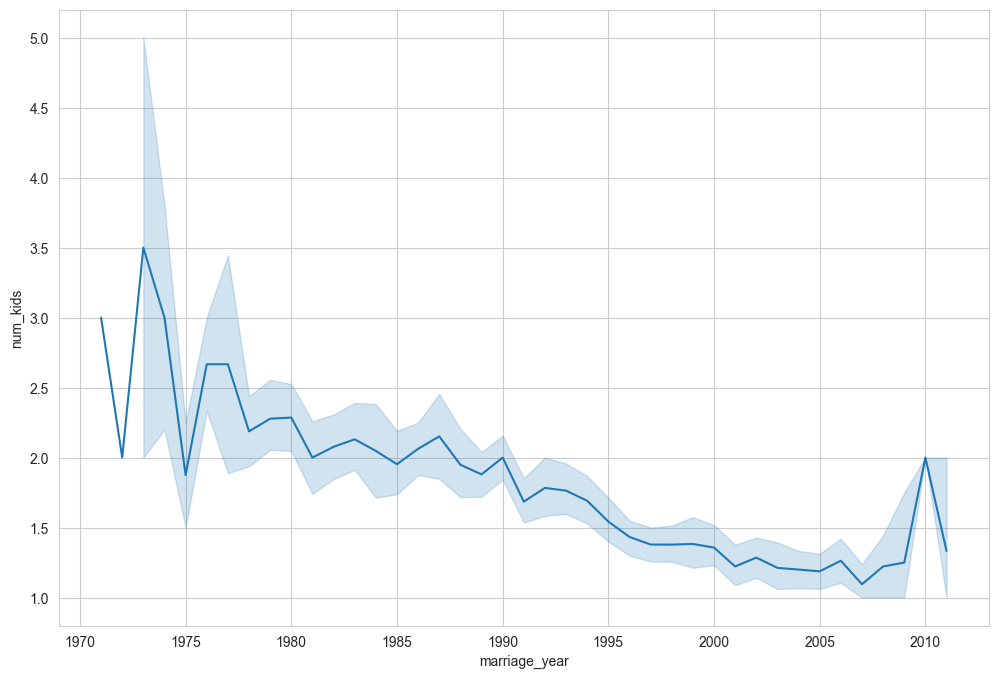

In [10]:
# Define the marriage_year column
divorce["marriage_year"] = divorce["marriage_date"].dt.year

# Create a line plot showing the average number of kids by year
plt.figure(figsize=(12, 8))
sns.lineplot(data=divorce, x="marriage_year", y="num_kids")
plt.show()

## Correlation

### Interpreting a heatmap

Which of the below statements is correct regarding the relationships between variables in the divorce DataFrame?

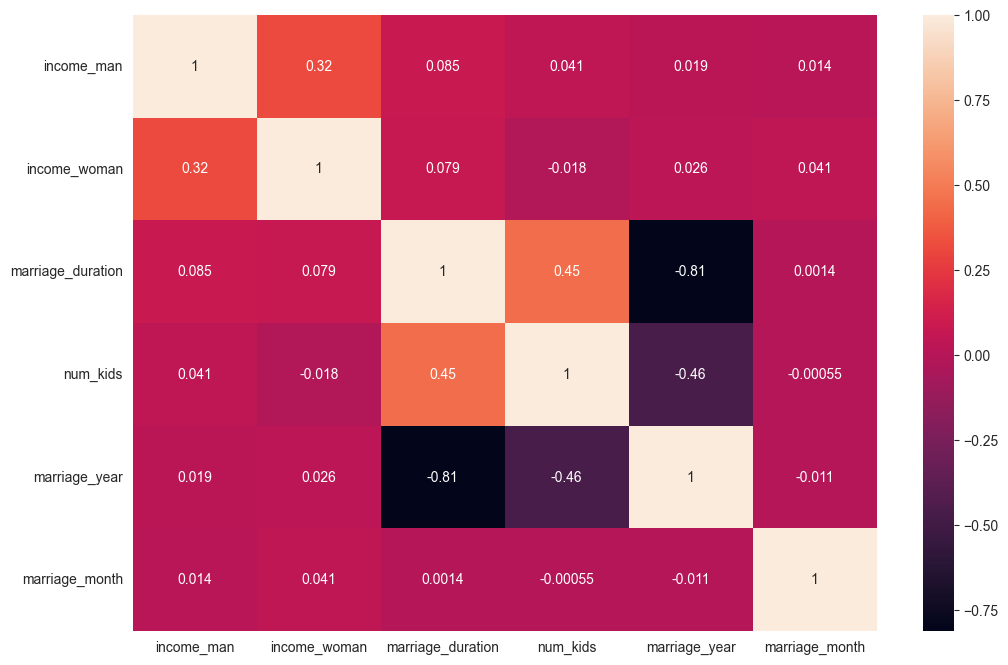

In [19]:
# Define the marriage_year column
divorce["marriage_month"] = divorce["marriage_date"].dt.month
corr = divorce[['income_man','income_woman','marriage_duration','num_kids','marriage_year','marriage_month']].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True)
plt.show()

### Visualizing variable relationships

In the last exercise, you may have noticed that a longer marriage_duration is correlated with having more children, represented by the num_kids column. The correlation coefficient between the marriage_duration and num_kids variables is 0.45.

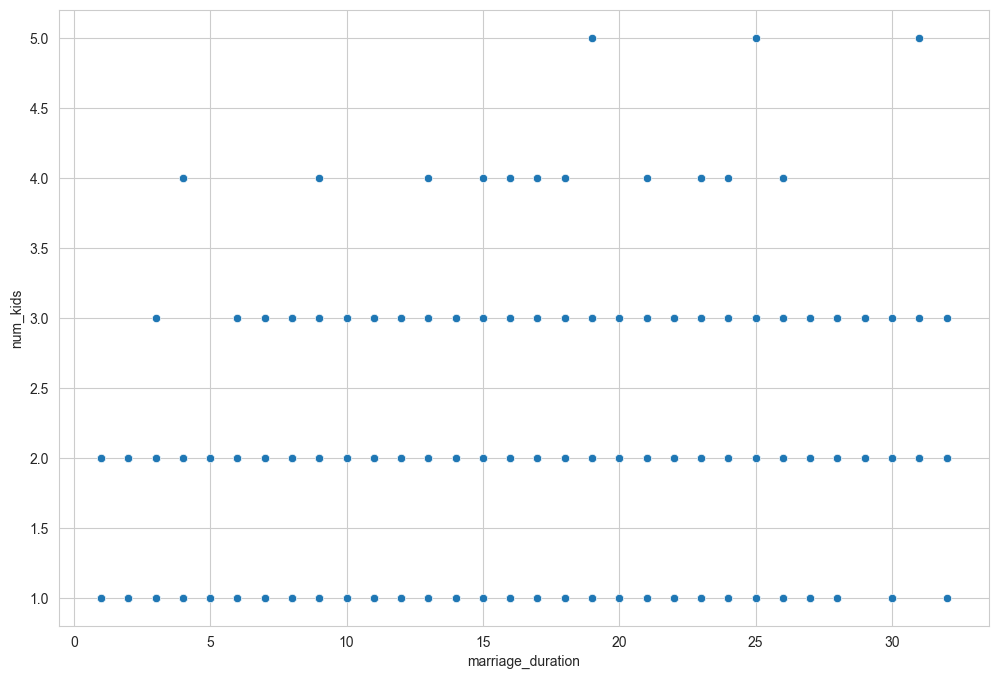

In [21]:
# Create a scatterplot showing marriage_duration on the x-axis and num_kids on the y-axis.
plt.figure(figsize=(12, 8))
sns.scatterplot(data=divorce,x="marriage_duration", y="num_kids")
plt.show()

### Visualizing multiple variable relationships

Seaborn's .pairplot() is excellent for understanding the relationships between several or all variables in a dataset by aggregating pairwise scatter plots in one visual.

<Figure size 1200x1200 with 0 Axes>

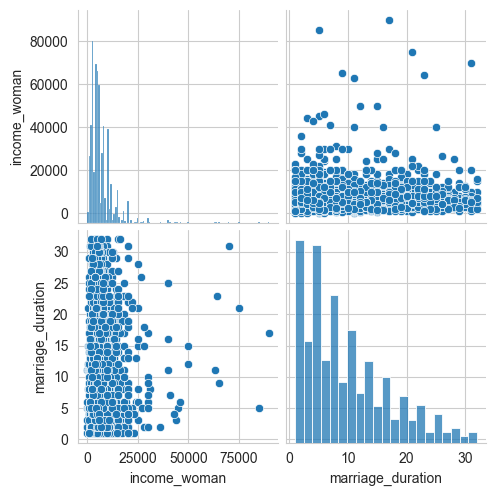

In [23]:
# Create a pairplot for income_woman and marriage_duration
plt.figure(figsize=(12, 12))
sns.pairplot(data=divorce, vars=['income_woman' , 'marriage_duration'])
plt.show()

## Factor relationship and distribution

### Categorical data in scatter plots

Your task is to create a scatter plot of each woman's age and income, layering in the categorical variable of education level for additional context.

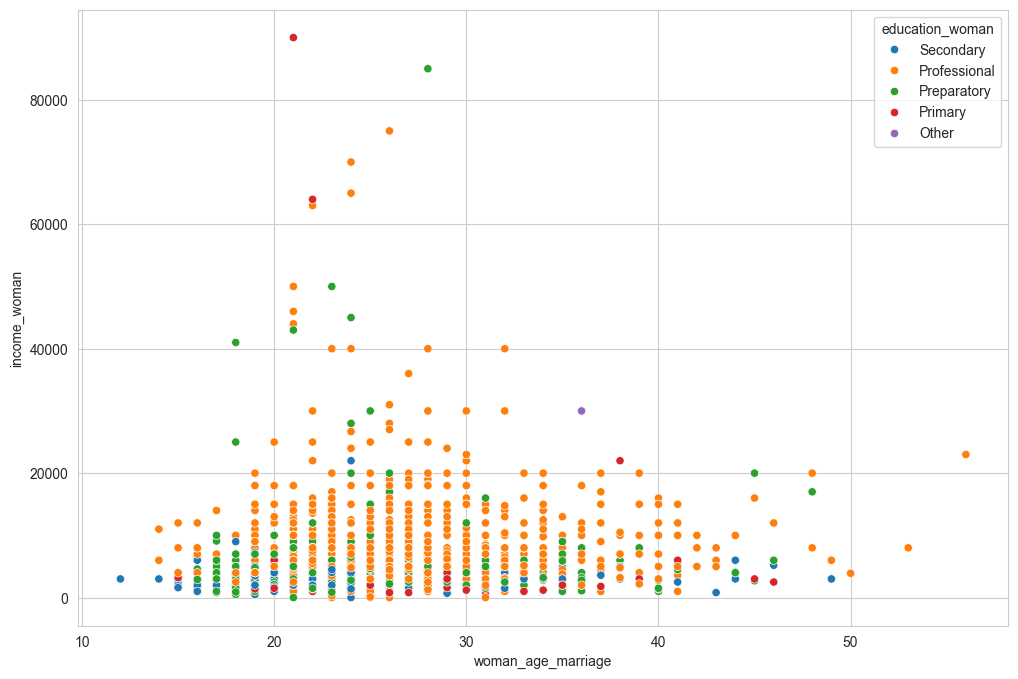

In [25]:
divorce["man_age_marriage"] = divorce["marriage_year"] - divorce["dob_man"].dt.year
divorce["woman_age_marriage"] = divorce["marriage_year"] - divorce["dob_woman"].dt.year


# Create a scatter plot that shows woman_age_marriage on the x-axis and income_woman on the y-axis; each data point should be colored based on the woman's level of education, represented by education_woman.
plt.figure(figsize=(12, 8))
sns.scatterplot(data=divorce,x="woman_age_marriage", y="income_woman", hue='education_woman')
plt.show()

### Exploring with KDE plots

Suppose you are interested in the relationship between marriage duration and the number of kids that a couple has. Since values in the num_kids column range only from one to five, you can plot the KDE for each value on the same plot.

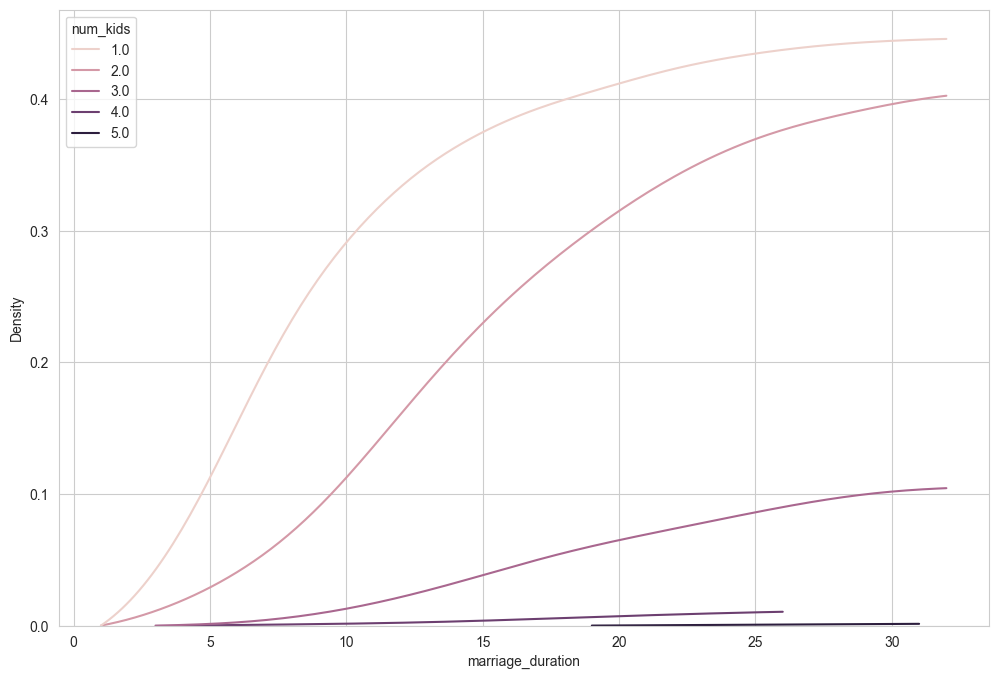

In [28]:
# Create a KDE plot that shows marriage_duration on the x-axis and a different colored line for each possible number of children that a couple might have, represented by num_kids
plt.figure(figsize=(12, 8))
sns.kdeplot(data=divorce, x="marriage_duration", hue="num_kids", cut=0, cumulative=True)
plt.show()